<a href="https://colab.research.google.com/github/Jeonkyoungyong/bigdata/blob/main/13%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
raw_data = pd.read_csv('/content/drive/MyDrive/13week/survey_results_public.csv')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

In [4]:
#전체 데이터 살피기 column 선택
target_data = raw_data[['Age', 'Country', 'LanguageHaveWorkedWith', 'LearnCode']]
target_data.head()

,Age,Country,LanguageHaveWorkedWith,LearnCode
0,18-24 years old,NaN,NaN,NaN
1,25-34 years old,United States of America,HTML/CSS;JavaScript;Python,Books / Physical media;Colleague;Friend or fam...
2,45-54 years old,United States of America,Bash/Shell (all shells);Go,Books / Physical media;Colleague;On the job tr...
3,25-34 years old,United States of America,Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,Colleague;Friend or family member;Other online...
4,25-34 years old,Philippines,HTML/CSS;JavaScript;TypeScript,Books / Physical media;Online Courses or Certi...


In [5]:
target_data['LearnCode']
target_data['LearnCode'].drop_duplicates()

0                                                      NaN
1        Books / Physical media;Colleague;Friend or fam...
2        Books / Physical media;Colleague;On the job tr...
3        Colleague;Friend or family member;Other online...
4        Books / Physical media;Online Courses or Certi...
                               ...                        
87034    Books / Physical media;Colleague;Friend or fam...
87035    Books / Physical media;Colleague;Friend or fam...
87207    Books / Physical media;Friend or family member...
87970    Books / Physical media;On the job training;Oth...
88974    Colleague;Hackathons (virtual or in-person);Co...
Name: LearnCode, Length: 791, dtype: object

In [6]:
size_by_LearnCode = target_data.groupby('LearnCode').size()
size_by_LearnCode

LearnCode
Books / Physical media                                                                                                  816
Books / Physical media;Coding Bootcamp                                                                                   69
Books / Physical media;Coding Bootcamp;Other (please specify):                                                            4
Books / Physical media;Colleague                                                                                         75
Books / Physical media;Colleague;Coding Bootcamp                                                                         17
                                                                                                                       ... 
Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc);Other (please specify):     193
School (i.e., University, College, etc)                                                                                216

<Axes: ylabel='LearnCode'>

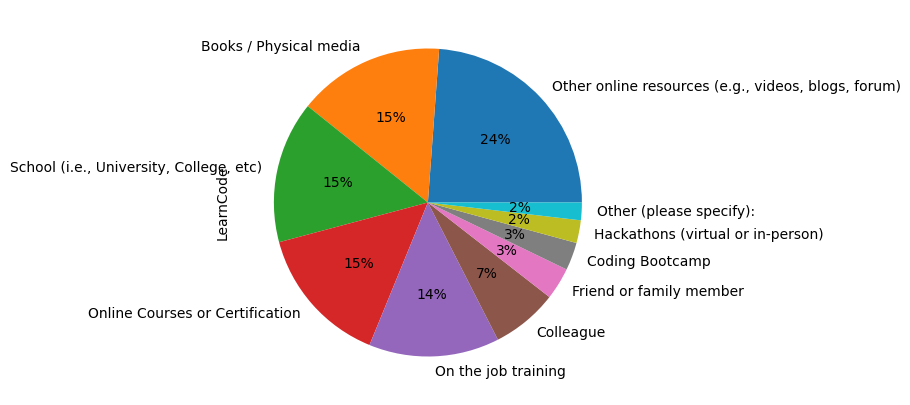

In [7]:
#세계 개발자 현황 분석(csv)-learncode 데이터 활용
methods = target_data['LearnCode']
methods
methods = methods.str.split(';')
methods
exploded_methods = methods.explode()
exploded_methods
size_by_methods = exploded_methods.groupby(exploded_methods).size()
size_by_methods
size_by_methods.nlargest(10).plot.pie(figsize=(5,5), autopct='%1.0f%%')